In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_ingresos = pd.read_csv(r'dataset_processed\Internet_fijo_Ingresos_prces.csv')
df_ingresos_movil = pd.read_csv(r'dataset_processed\Telefonia_movil_Ingresos_prces.csv')


In [5]:
df_ingresos.columns

Index(['Año', 'Trimestre', 'Ingresos_miles_pesos'], dtype='object')

In [6]:
df_ingresos_movil.columns

Index(['Año', 'Trimestre', 'Ingresos_miles_pesos'], dtype='object')

In [7]:
df_ingresos_movil.shape

(35, 3)

In [8]:
df_ingresos.shape

(35, 3)

In [9]:
df_ingresos = df_ingresos.merge(df_ingresos_movil[['Ingresos_miles_pesos']], left_index=True, right_index=True, suffixes=('', '_movil'))

In [10]:

df_ingresos.rename(columns={'Ingresos_miles_pesos': 'Ingresos_InternetFijo'}, inplace=True)

df_ingresos.rename(columns={'Ingresos_miles_pesos_movil': 'Ingresos_TelefoniaMovil'}, inplace=True)

In [11]:
df_ingresos.tail(10)

,Año,Trimestre,Ingresos_InternetFijo,Ingresos_TelefoniaMovil
25,2020,2,32102476,73538944
26,2020,3,31997445,79634755
27,2020,4,33539703,83479114
28,2021,1,36676371,93112153
29,2021,2,38239667,104782020
30,2021,3,42999944,117751925
31,2021,4,45467887,127389786
32,2022,1,55589997,130454676
33,2022,2,60335724,153032313
34,2022,3,67055930,174057836


In [12]:
df_suma_trimestral = df_ingresos.groupby('Año')[['Ingresos_InternetFijo','Ingresos_TelefoniaMovil']].sum()
df_suma_trimestral

,Ingresos_InternetFijo,Ingresos_TelefoniaMovil
Año,,
2014,13683949,72607710
2015,20108814,85950000
2016,26867508,107676433
2017,39671973,138536546
2018,59539594,166694340
2019,86772531,231880240
2020,127585840,308729960
2021,163383869,443035884
2022,182981651,457544825


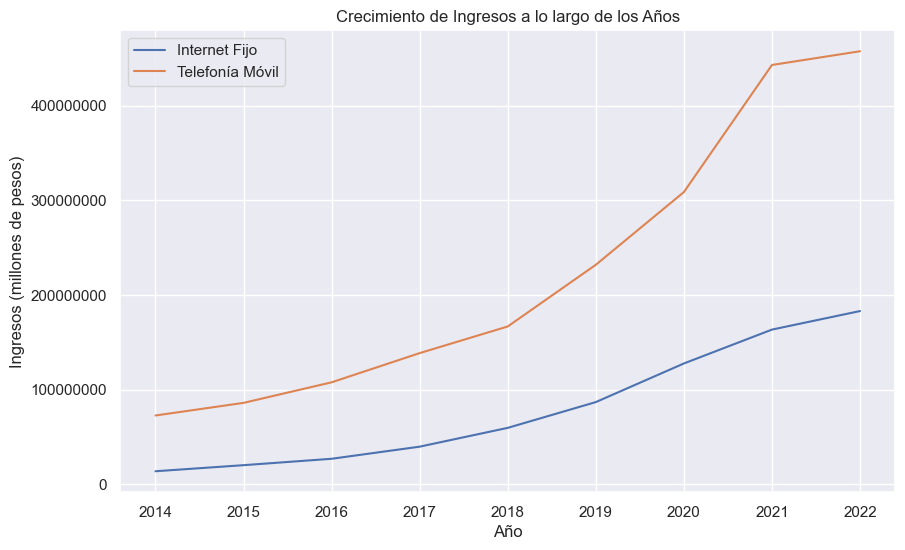

In [13]:
# Configurar el estilo de los gráficos de Seaborn
sns.set(style="darkgrid")

# Crear el gráfico de líneas utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Ingresos_InternetFijo', data=df_suma_trimestral, label='Internet Fijo')
sns.lineplot(x='Año', y='Ingresos_TelefoniaMovil', data=df_suma_trimestral, label='Telefonía Móvil')

# Configurar el título y etiquetas de los ejes
plt.title('Crecimiento de Ingresos a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ingresos (millones de pesos)')

# Ajustar la visualización de los valores del eje y
plt.ticklabel_format(style='plain', axis='y')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [14]:
df_crecimiento_anual = df_suma_trimestral.pct_change() * 100
df_crecimiento_anual.fillna(0,inplace=True)

In [15]:
df_crecimiento_anual

,Ingresos_InternetFijo,Ingresos_TelefoniaMovil
Año,,
2014,0.000000,0.000000
2015,46.951834,18.375858
2016,33.610605,25.277991
2017,47.657807,28.660044
2018,50.079740,20.325174
2019,45.739205,39.105047
2020,47.034826,33.141987
2021,28.057995,43.502718
2022,11.994931,3.274891


In [16]:
promedio_crecimiento_internet_fijo = df_crecimiento_anual['Ingresos_InternetFijo'].mean()
promedio_crecimiento_telefonia_movil = df_crecimiento_anual['Ingresos_TelefoniaMovil'].mean()

print("Promedio de crecimiento para Internet Fijo:", round(promedio_crecimiento_internet_fijo,0))
print("Promedio de crecimiento para Telefonía Móvil:", round(promedio_crecimiento_telefonia_movil,0))


Promedio de crecimiento para Internet Fijo: 35.0
Promedio de crecimiento para Telefonía Móvil: 24.0


### KPI
Podemos marcar como **minimo** de crecimiento anual el promedio de crecimiento a lo largo de estos anios, si se cumple perfecto, si no se cumple habra que evaluar que paso ese anio. 

Hay que tener en cuenta que aun asi solo tenemos datos hasta el tercer trimestre de 2022, por lo tanto habra un pequeño faltante en el ultimo anio.

In [17]:
df_crecimiento_anual.reset_index(inplace=True)

In [18]:
df_crecimiento_anual
df_crecimiento_anual.to_csv(r'dataset_processed\crecimiento_anual.csv', index=False)